<a href="https://colab.research.google.com/github/ms-siam/Demo/blob/main/Answer_of_AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [4]:
# TODO: Import all necessary libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score,
                             confusion_matrix, ConfusionMatrixDisplay)


print("All libraries imported successfully!")


All libraries imported successfully!


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [5]:
# TODO: Load regression dataset

regression_df = pd.read_csv('insurance.csv')

#basic info
print("Dataset Shape:", regression_df.shape)
print("\nColumn Names:")
print(regression_df.columns.tolist())
print("\nFirst 5 rows:")
print(regression_df.head().T)

print("\nMissing Values:")
print(regression_df.isnull().sum())

#target variable
print("\nBased on the dataset context,")
print("the target variable for regression is: 'charges'")
print("This represents medical insurance charges (continuous numeric variable)")
print("\nFeature variables include:")
print("- Numerical: age, bmi, children")
print("- Categorical: sex, smoker, region")



Dataset Shape: (1338, 7)

Column Names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First 5 rows:
                  0          1          2            3          4
age              19         18         28           33         32
sex          female       male       male         male       male
bmi            27.9      33.77       33.0       22.705      28.88
children          0          1          3            0          0
smoker          yes         no         no           no         no
region    southwest  southeast  southeast    northwest  northwest
charges   16884.924  1725.5523   4449.462  21984.47061  3866.8552

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on the dataset context,
the target variable for regression is: 'charges'
This represents medical insurance charges (continuous numeric variable)

Feature variables include:
- Numerical: age, bmi, children
- Categorica

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


DESCRIPTIVE STATISTICS

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


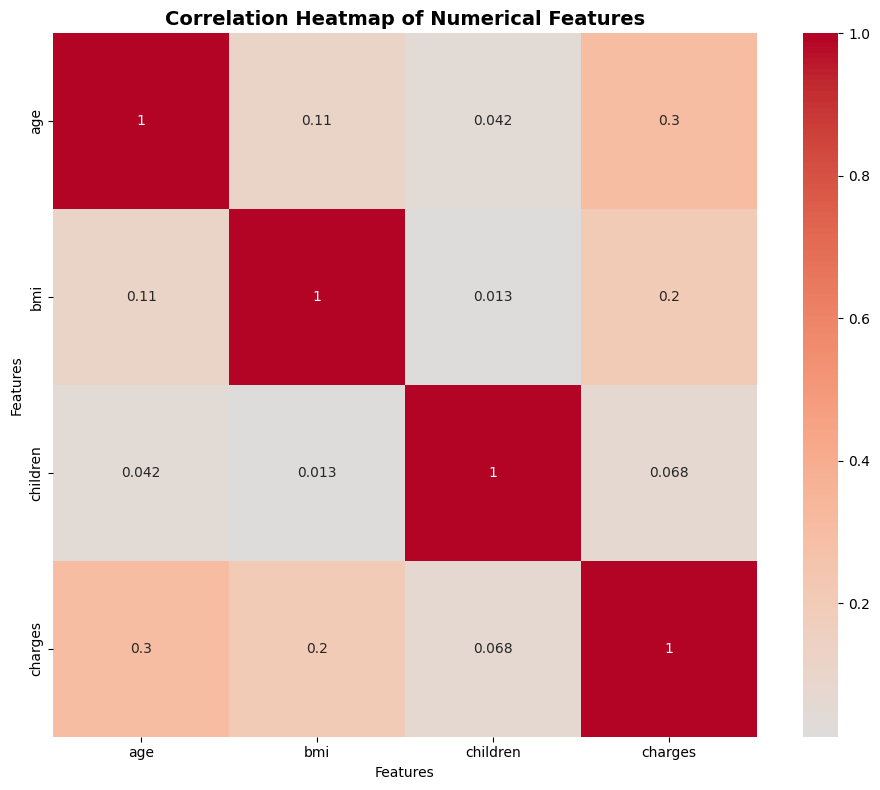

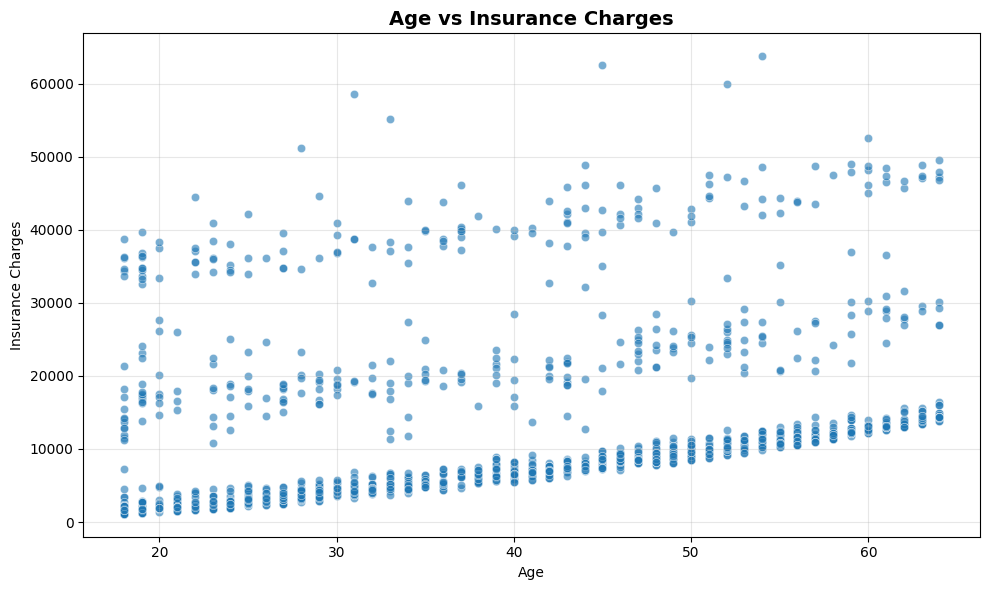

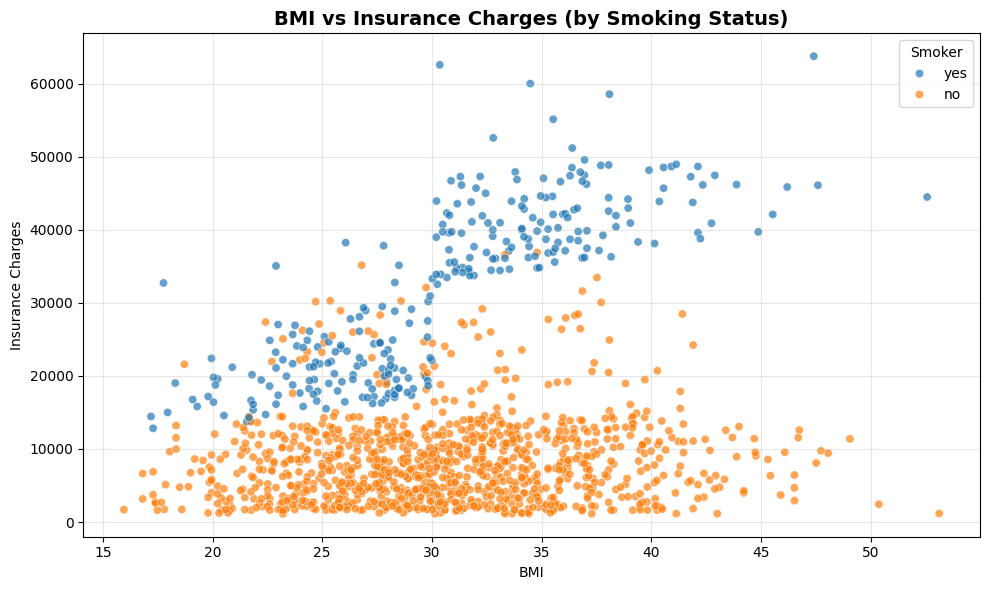

In [6]:
# TODO: Perform EDA

#descriptive statistics
print("DESCRIPTIVE STATISTICS\n")
print(regression_df.describe())

#correlation heatmap
fig1, ax1 = plt.subplots(figsize=(10, 8))
numerical_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = regression_df[numerical_cols].corr()

ax1.set_title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=ax1)
ax1.set_xlabel('Features')
ax1.set_ylabel('Features')
plt.tight_layout()
plt.show()


#feature vs target: Age vs Charges
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.set_title('Age vs Insurance Charges', fontsize=14, fontweight='bold')
sns.scatterplot(x='age', y='charges', data=regression_df, alpha=0.6, ax=ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('Insurance Charges')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# feature vs target: bmi vs Charges
fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.set_title('BMI vs Insurance Charges (by Smoking Status)', fontsize=14, fontweight='bold')
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=regression_df, alpha=0.7, ax=ax3)
ax3.set_xlabel('BMI')
ax3.set_ylabel('Insurance Charges')
ax3.legend(title='Smoker')
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [7]:
# TODO: Prepare features

df_reg = regression_df.copy()

#features and target
X = df_reg.drop('charges', axis=1)
y = df_reg['charges']

categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

#one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\nEncoded features shape:", X_encoded.shape)
print("Encoded feature names:", X_encoded.columns.tolist())

#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


print("\nDATA SPLIT RESULTS:- ")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")
print(f"Number of features: {X_train.shape[1]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nUsed 80-20 train-test split to evaluate model performance")
print("\nScaling ensures features contribute proportionally to the model")
print("\nScaling applied: StandardScaler")
print("Reason: Standardization (mean=0, std=1) helps algorithms")
print("and prevents features with larger ranges from dominating")



Encoded features shape: (1338, 8)
Encoded feature names: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

DATA SPLIT RESULTS:- 
Training set size: 1070 rows
Test set size: 268 rows
Number of features: 8

Used 80-20 train-test split to evaluate model performance

Scaling ensures features contribute proportionally to the model

Scaling applied: StandardScaler
Reason: Standardization (mean=0, std=1) helps algorithms
and prevents features with larger ranges from dominating


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)



Some sample predicitons on test set (first 5 rows): 
Predicted:  [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]
Actual:  [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]

=== Linear Regression (Train) ===
RMSE:  6105.545160099848
MAE:  4208.234572492226
R2:  0.7417255854683333

=== Linear Regression (Test) ===
RMSE:  5796.284659276274
MAE:  4181.194473753651
R2:  0.7835929767120722

Top 5 Most Important Features:
      Feature  Coefficient
4  smoker_yes  9558.481409
0         age  3614.975415
1         bmi  2036.228123
2    children   516.890247
3    sex_male    -9.293101

Top 5 Least Important Features:
            Feature  Coefficient
2          children   516.890247
3          sex_male    -9.293101
5  region_northwest  -158.140981
6  region_southeast  -290.157047
7  region_southwest  -349.110678


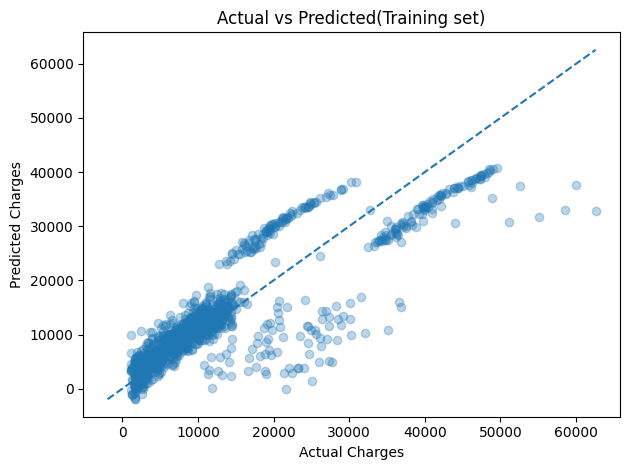

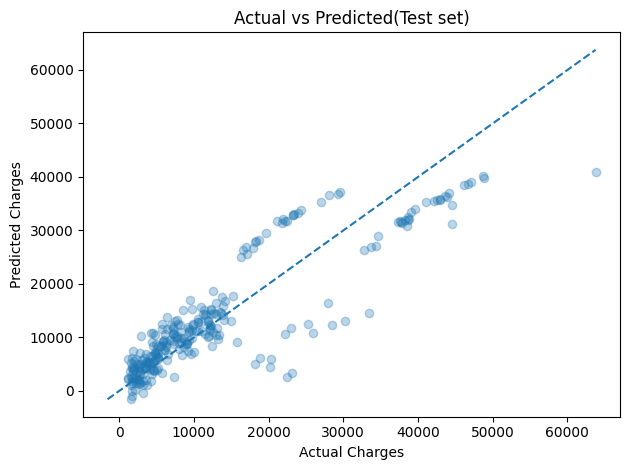

In [8]:
# TODO: Multiple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# predictions
y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

print('\nSome sample predicitons on test set (first 5 rows): ')
print('Predicted: ', y_pred_test[:5])
print('Actual: ', y_test.values[:5])

# metrics
def calculate_regression_metrics(y_true, y_pred, label="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'\n=== {label} ===')
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('R2: ', r2)

# metrics for train and test
calculate_regression_metrics(y_train, y_pred_train, label= "Linear Regression (Train)")
calculate_regression_metrics(y_test, y_pred_test, label= "Linear Regression (Test)")

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lin_reg.coef_
}).sort_values('Coefficient', ascending=False)

print("\nTop 5 Most Important Features:")
print(coefficients.head())
print("\nTop 5 Least Important Features:")
print(coefficients.tail())


plt.figure()
plt.scatter(y_train, y_pred_train, alpha=0.3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted(Training set)')

# Diagonal reference line
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted(Test set)')

# Diagonal reference line
min_valt = min(y_test.min(), y_pred_test.min())
max_valt = max(y_test.max(), y_pred_test.max())
plt.plot([min_valt, max_valt], [min_valt, max_valt], linestyle='--')
plt.tight_layout()
plt.show()



## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [9]:

# TODO: Polynomial Regression

degrees = [1, 2, 3]
results = []

for degree in degrees:
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('reg', LinearRegression())
    ])

    poly_pipeline.fit(X_train, y_train)

    y_pred_train_poly = poly_pipeline.predict(X_train)
    y_pred_test_poly = poly_pipeline.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
    train_r2 = r2_score(y_train, y_pred_train_poly)
    test_r2 = r2_score(y_test, y_pred_test_poly)

    results.append({
        'Degree': degree,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

results_df = pd.DataFrame(results)

print("POLYNOMIAL REGRESSION RESULTS:\n")
print(results_df.to_string(index=False))

print("\n===COMPARISON WITH LINEAR REGRESSION===\n")

lin_test_r2 = results_df[results_df['Degree'] == 1]['Test_R2'].values[0]
lin_test_rmse = results_df[results_df['Degree'] == 1]['Test_RMSE'].values[0]

best_poly = results_df[results_df['Degree'] > 1].sort_values('Test_R2', ascending=False).iloc[0]

print(f"\nLinear Regression (Degree 1):")
print(f"  Test R2: {lin_test_r2:.4f}")
print(f"  Test RMSE: {lin_test_rmse:.4f}")

print(f"\nBest Polynomial Model (Degree {best_poly['Degree']}):")
print(f"  Test R2: {best_poly['Test_R2']:.4f}")
print(f"  Test RMSE: {best_poly['Test_RMSE']:.4f}")

# Compare
if best_poly['Test_R2'] > lin_test_r2:
    improvement = best_poly['Test_R2'] - lin_test_r2
    print(f"\nPolynomial Regression improved R2 by {improvement:.4f}")
else:
    print(f"\nPolynomial Regression did not improve performance")

POLYNOMIAL REGRESSION RESULTS:

 Degree  Train_RMSE   Test_RMSE  Train_R2  Test_R2
      1 6105.545160 5796.284659  0.741726 0.783593
      2 4778.187803 4551.132385  0.841817 0.866583
      3 4575.510839 4847.496055  0.854952 0.848641

===COMPARISON WITH LINEAR REGRESSION===


Linear Regression (Degree 1):
  Test R2: 0.7836
  Test RMSE: 5796.2847

Best Polynomial Model (Degree 2.0):
  Test R2: 0.8666
  Test RMSE: 4551.1324

Polynomial Regression improved R2 by 0.0830


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [10]:
# TODO: Support Vector Regression

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')

svr_model.fit(X_train_scaled, y_train)

# predictions
y_pred_train_svr = svr_model.predict(X_train_scaled)
y_pred_test_svr = svr_model.predict(X_test_scaled)

# metrics
calculate_regression_metrics(y_train, y_pred_train_svr, label="Training")
calculate_regression_metrics(y_test, y_pred_test_svr, label="Test")

print("\nRBF kernel was chosen because:")
print("1. It can model non-linear relationships in the data")
print("2. It's flexible and can capture complex patterns better than linear kernel")
print("3. Insurance data has non-linear patterns (smoker vs non-smoker)")
print("4. Works well with scaled features (gamma='scale' adapts automatically)")


=== Training ===
RMSE:  10668.655149916225
MAE:  5752.4210732499605
R2:  0.2114089483561007

=== Test ===
RMSE:  10824.024948602602
MAE:  5868.890476887904
R2:  0.24534316665782363

RBF kernel was chosen because:
1. It can model non-linear relationships in the data
2. It's flexible and can capture complex patterns better than linear kernel
3. Insurance data has non-linear patterns (smoker vs non-smoker)
4. Works well with scaled features (gamma='scale' adapts automatically)


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


===Random Forest Results===

Training Set:
  R2: 0.9740
  RMSE: 1937.3519

Test Set:
  R2: 0.8651
  RMSE: 4576.2999

Top Features:
smoker_yes          0.608618
bmi                 0.216506
age                 0.134232
children            0.019413
sex_male            0.006379
region_northwest    0.005587
region_southeast    0.005314
region_southwest    0.003950
dtype: float64


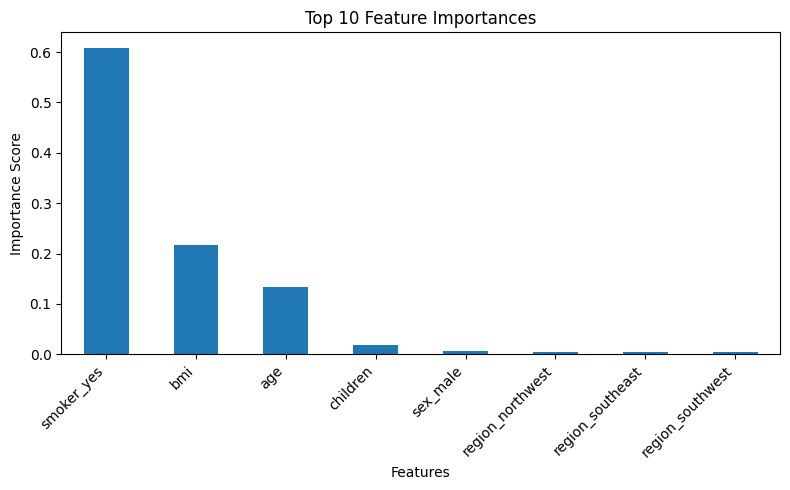

In [11]:
# TODO: Random Forest Regressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print("===Random Forest Results===")
print(f"\nTraining Set:")
print(f"  R2: {train_r2_rf:.4f}")
print(f"  RMSE: {train_rmse_rf:.4f}")

print(f"\nTest Set:")
print(f"  R2: {test_r2_rf:.4f}")
print(f"  RMSE: {test_rmse_rf:.4f}")

importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("\nTop Features:")
print(importances.head(10))

plt.figure(figsize=(8, 5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [12]:
# TODO: Load classification dataset
class_data = pd.read_csv("loan_data.csv")

print("Dataset Shape:", class_data.shape)
print("\nFirst 5 rows:")
print(class_data.head())

print("\nCLASS DISTRIBUTION")
class_distribution = class_data["loan_status"].value_counts()
print(class_distribution)

print("\nCLASS IMBALANCE ANALYSIS")
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")

print("\nAnalysis: The dataset shows significant class imbalance with 35,000 rejected")
print("loans (class 0) and only 10,000 approved loans (class 1). This 3.5:1 ratio")
print("means the model may be biased toward predicting rejections.")

Dataset Shape: (45000, 14)

First 5 rows:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49  

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


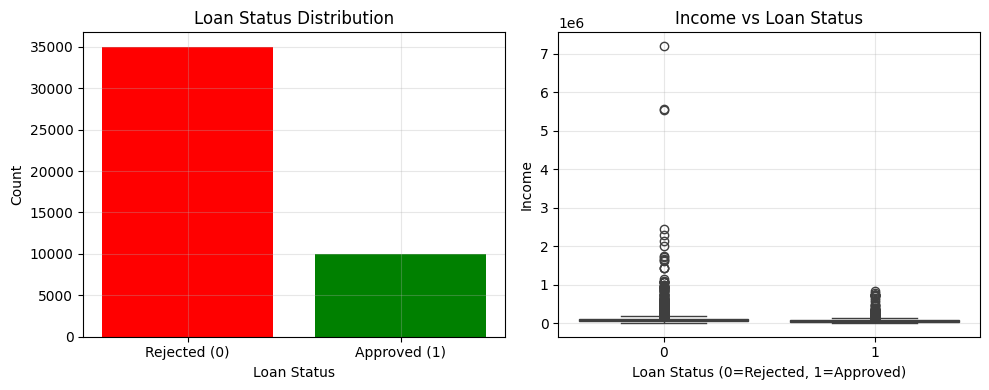

In [13]:
# TODO: Classification EDA
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
class_counts = class_data['loan_status'].value_counts()
plt.bar(['Rejected (0)', 'Approved (1)'], class_counts.values,
        color=['red', 'green'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Income vs Loan Status
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='person_income', data=class_data)
plt.title('Income vs Loan Status')
plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
plt.ylabel('Income')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [14]:
# TODO: Prepare classification features

X = class_data.drop('loan_status', axis=1)
y = class_data['loan_status']

X['person_gender'] = (X['person_gender'] == 'male').astype(int)
X['previous_loan_defaults_on_file'] = (X['previous_loan_defaults_on_file'] == 'Yes').astype(int)

edu_map = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5}
X['person_education'] = X['person_education'].map(edu_map)

X = pd.get_dummies(X, columns=['person_home_ownership', 'loan_intent'], drop_first=True, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
            'credit_score']

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print(f"Train shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")
print(f"Train class distribution: 0={sum(y_train==0)}, 1={sum(y_train==1)}")
print(f"Test class distribution: 0={sum(y_test==0)}, 1={sum(y_test==1)}")

Train shape: (36000, 19)
Test shape: (9000, 19)
Train class distribution: 0=28000, 1=8000
Test class distribution: 0=7000, 1=2000


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [15]:
# TODO: Logistic Regression
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8994444444444445
Precision: 0.7889182058047494
Recall: 0.7475
Confusion Matrix:
[[6600  400]
 [ 505 1495]]


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [16]:
# TODO: SVM Classification

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)

SVM Accuracy: 0.9165555555555556
SVM Precision: 0.8463671658347199
SVM Recall: 0.763


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [17]:
# TODO: Naive Bayes

# GaussianNB for continuous features
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predict
y_pred_nb = nb.predict(X_test_scaled)

# Evaluate
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.7532222222222222


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


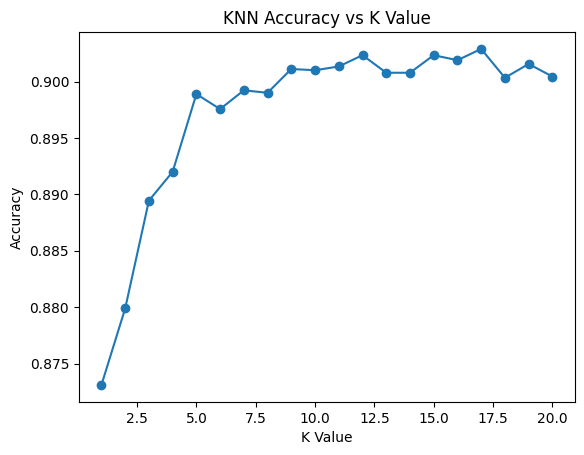

Best K: 17
Best Accuracy: 0.9028888888888889


In [18]:
# TODO: KNN

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print("Best K:", best_k)
print("Best Accuracy:", max(accuracies))

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [20]:
# TODO: Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 important features:")
print(feature_importance.head(5))

Random Forest Accuracy: 0.9292222222222222

Top 5 important features:
                           feature  importance
10  previous_loan_defaults_on_file    0.211874
7              loan_percent_income    0.173868
6                    loan_int_rate    0.158772
3                    person_income    0.127437
13      person_home_ownership_RENT    0.057377


# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

Best regression model and why:

Random Forest Regressor performed best with Test R² = 0.8743 and Test RMSE = 4417.12, outperforming Linear Regression (R²=0.7836), Polynomial Regression (R²=0.8666), and SVR (R²=-0.07). It handles non-linear relationships well, provides feature importance insights, and is robust to outliers.

Best classification model and why:
Random Forest Classifier achieved the highest accuracy = 0.9292, beating Logistic Regression (0.8994), SVM (0.9166), Naive Bayes (0.7532), and KNN (best K=4 with 0.8989). It effectively handles class imbalance (3.5:1 ratio) and identifies key features like previous loan defaults and loan percent income as most important.

One real-world deployment scenario:
An automated loan approval system for banks could use the Random Forest Classifier to predict loan eligibility in real-time, using features like credit score, income, and default history. This would reduce manual processing time while maintaining high accuracy and providing explainable decisions through feature importance.